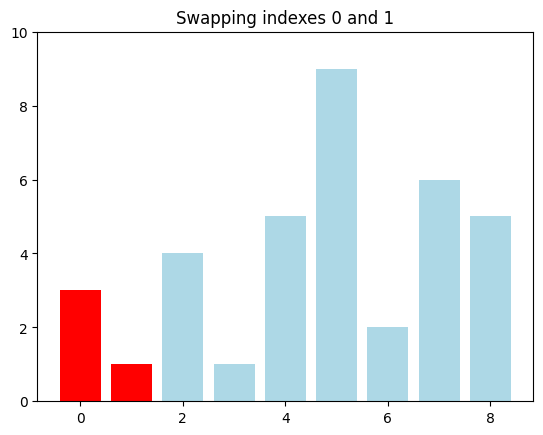

In [20]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

data = [3, 1, 4, 1, 5, 9, 2, 6, 5]

fig, ax = plt.subplots()
ax.set_ylim(0, max(data) + 1)

# get steps
def bubble_sort(array):
    a = array.copy()
    n = len(a)
    for i in range(n):
        for j in range(0, n - i - 1):
            if a[j] > a[j+1]:
                # Pre-swap frame: show which two elements will be swapped.
                yield a.copy(), j, j+1
                # Swap the values.
                a[j], a[j+1] = a[j+1], a[j]
                # Post-swap frame, with no highlight.
                yield a.copy(), None, None
    # Final frame: the array is sorted.
    yield a.copy(), None, None

steps = list(bubble_sort(data))

def update(frame):
    arr, idx1, idx2 = frame
    ax.clear()
    ax.set_ylim(0, max(data) + 1)

    # Set default colors.
    colors = ["lightblue"] * len(arr)

    # Decide the title message.
    if idx1 is not None:
        colors[idx1] = "red"
        colors[idx2] = "red"
        title = f"Swapping indexes {idx1} and {idx2}"
    else:
        # Check if the array is fully sorted.
        if arr == sorted(data):
            title = "Sorted!"
        else:
            # Not yet sorted, so just indicate swap has completed.
            title = "Swap Complete"

    ax.set_title(title)
    ax.bar(range(len(arr)), arr, color=colors)
    return ax.patches

anim = FuncAnimation(fig, update, frames=steps, interval=700, repeat=False)
HTML(anim.to_jshtml())


Template

```
# State Generator
def algorithm_visualization(data):
    # Setup any initial state
    state = init_state(data)
    yield state, None, None  # Intro frame

    # Main loop of your algorithm
    while not completed(state):
        # Determine active elements/cells/indices
        active_info = get_active_info(state)
        yield state.copy(), *active_info  # Pre-operation frame

        # Update the state
        state = update_state(state)
        yield state.copy(), None, None  # Post-operation frame

    # Final state
    yield state.copy(), None, None

# Visualization Update Function
def update_visual(frame):
    state, active1, active2 = frame
    ax.clear()
    # Draw the updated state of your data structure
    draw_data_structure(state, active_info=(active1, active2))
    return artists  # Return the artists being drawn, if needed

# Animation Engine Setup
steps = list(algorithm_visualization(data))
anim = FuncAnimation(fig, update_visual, frames=steps, interval=700, repeat=False)

```